In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [36]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import statsmodels.api as sm
from folium.plugins import HeatMap


In [37]:
file_path = '/content/drive/MyDrive/output.csv'
data = pd.read_csv(file_path)

In [38]:
# Display the first few rows of the dataset
print(data.head())

        Entity Code  Year  Deaths  Sidedness  Historical_Population
0  Afghanistan  AFG  1990    4154          0             12412311.0
1  Afghanistan  AFG  1991    4472          0             13299016.0
2  Afghanistan  AFG  1992    5106          0             14485543.0
3  Afghanistan  AFG  1993    5681          0             15816601.0
4  Afghanistan  AFG  1994    6001          0             17075728.0


In [39]:
# Display the summary of the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8010 entries, 0 to 8009
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Entity                 8010 non-null   object 
 1   Code                   6150 non-null   object 
 2   Year                   8010 non-null   int64  
 3   Deaths                 8010 non-null   int64  
 4   Sidedness              8010 non-null   int64  
 5   Historical_Population  6300 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 375.6+ KB
None


In [40]:
# Display basic statistics
print(data.describe())

              Year        Deaths    Sidedness  Historical_Population
count  8010.000000  8.010000e+03  8010.000000           6.300000e+03
mean   2004.500000  4.451661e+04     0.213483           9.126228e+07
std       8.655982  1.269077e+05     0.409791           5.435589e+08
min    1990.000000  0.000000e+00     0.000000           1.126000e+03
25%    1997.000000  3.322500e+02     0.000000           1.219077e+06
50%    2004.500000  1.969500e+03     0.000000           6.502588e+06
75%    2012.000000  1.323600e+04     0.000000           2.302875e+07
max    2019.000000  1.285039e+06     1.000000           7.713468e+09


In [41]:
# Checking for missing values
print(data.isnull().sum())

Entity                      0
Code                     1860
Year                        0
Deaths                      0
Sidedness                   0
Historical_Population    1710
dtype: int64


In [42]:
# Filling missing values with median or a relevant value (optional step)
data['Code'].fillna('Unknown', inplace=True)
data['Historical_Population'].fillna(data['Historical_Population'].median(), inplace=True)

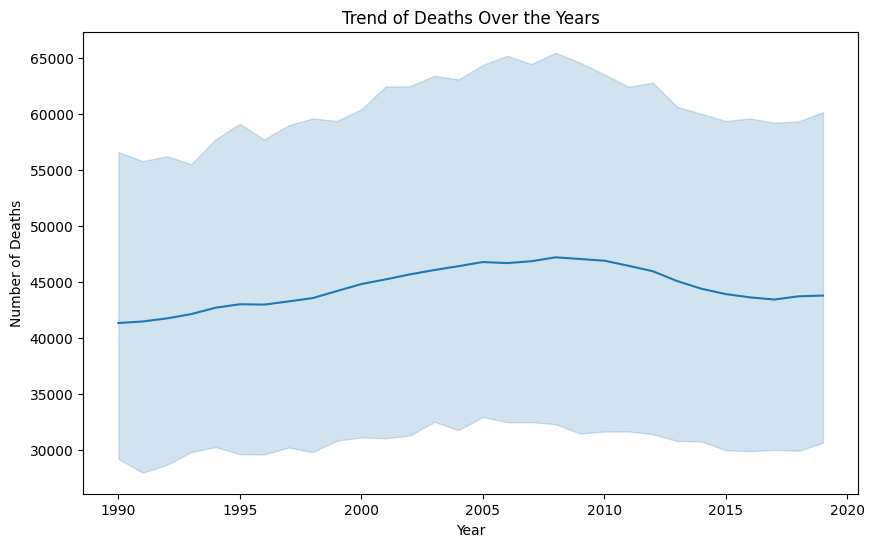

In [43]:
# Plotting the distribution of deaths by year
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Year', y='Deaths')
plt.title('Trend of Deaths Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.show()

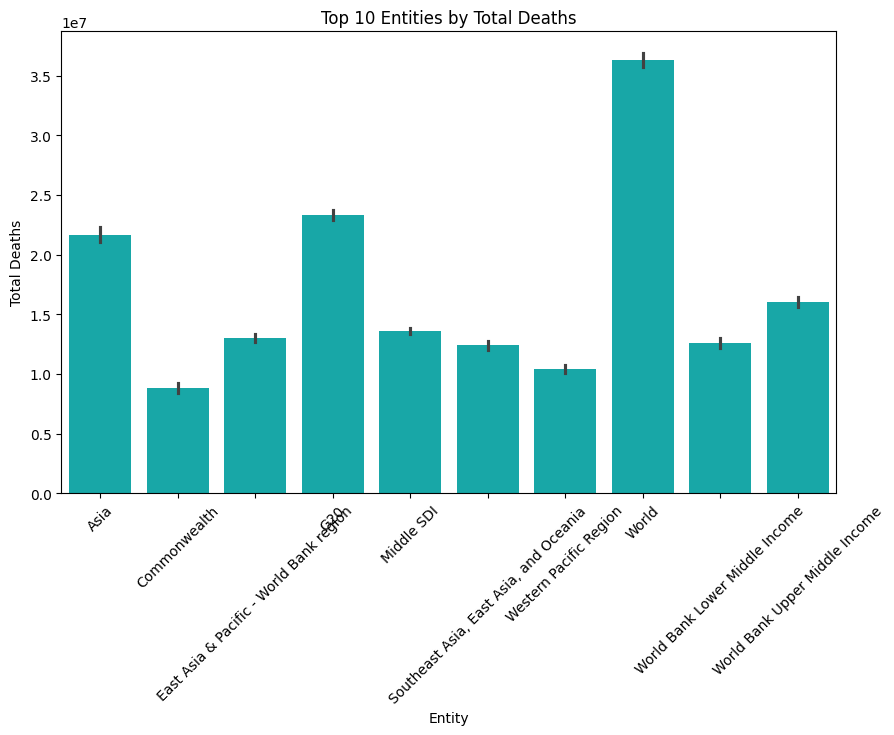

In [44]:
# Plotting the distribution of deaths by entity (top 10 entities with the most deaths)
top_entities = data.groupby('Entity')['Deaths'].sum().nlargest(10).index
plt.figure(figsize=(10, 6))
sns.barplot(data=data[data['Entity'].isin(top_entities)], x='Entity', y='Deaths', estimator=sum,color='c')
plt.title('Top 10 Entities by Total Deaths')
plt.xlabel('Entity')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45)
plt.show()

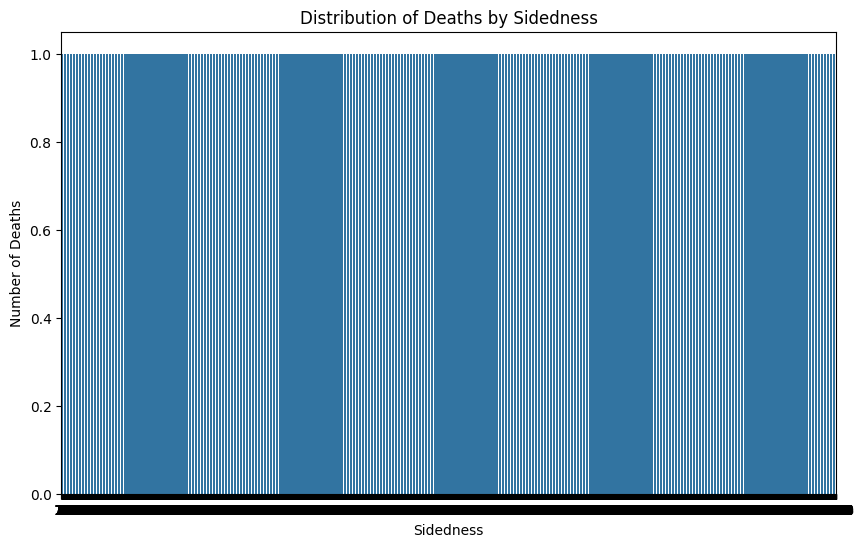

In [45]:
# Plotting the distribution of deaths by sidedness
plt.figure(figsize=(10, 6))
sns.countplot(data['Sidedness'])
plt.title('Distribution of Deaths by Sidedness')
plt.xlabel('Sidedness')
plt.ylabel('Number of Deaths')
plt.show()

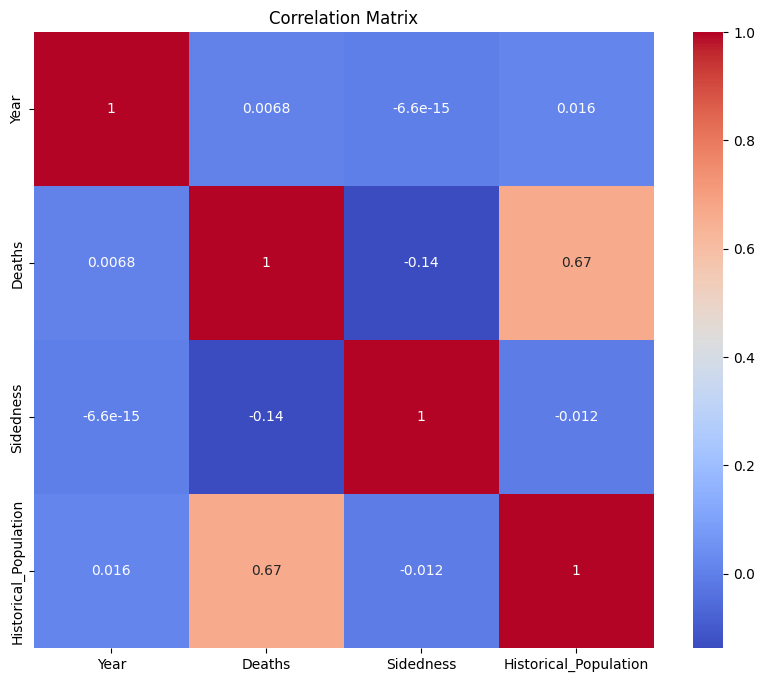

In [46]:
# Correlation matrix - select only numeric columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(10, 8))
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

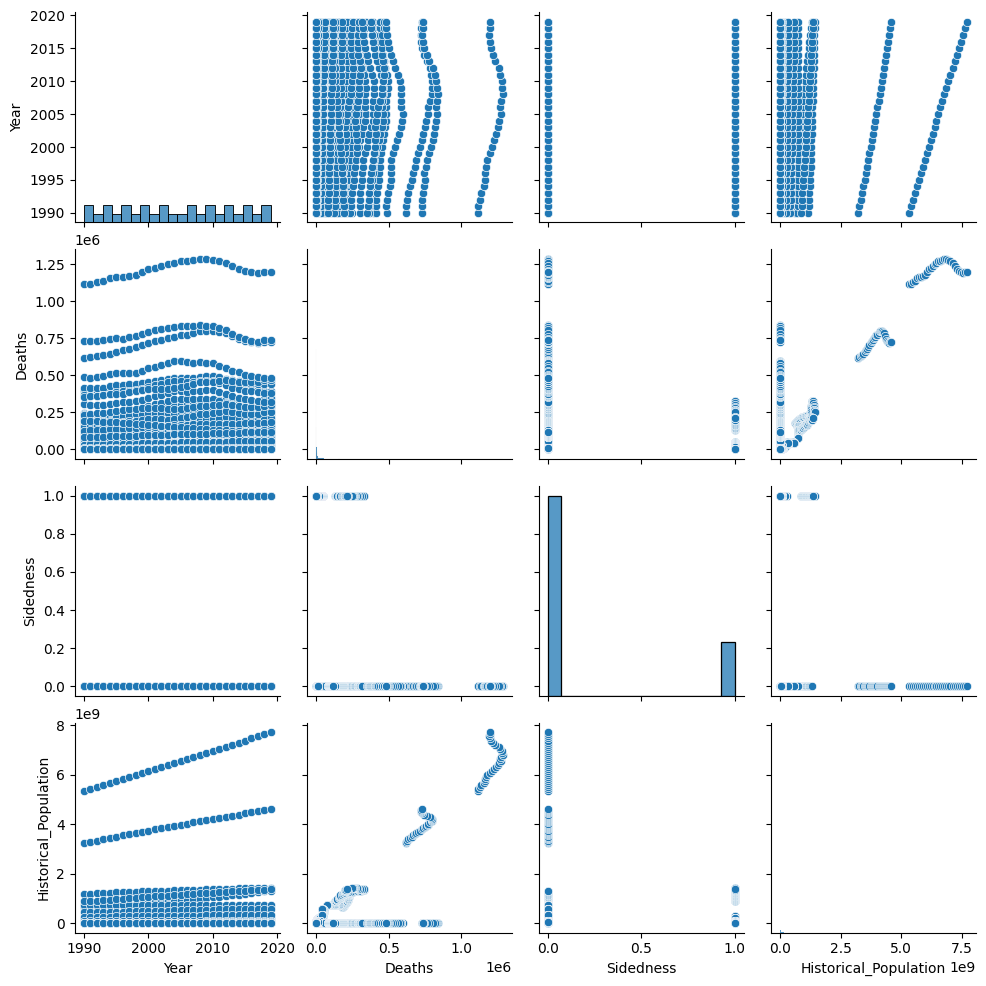

In [47]:
# Pairplot to observe the relationships between numerical variables
sns.pairplot(data[['Year', 'Deaths', 'Sidedness', 'Historical_Population']])
plt.show()

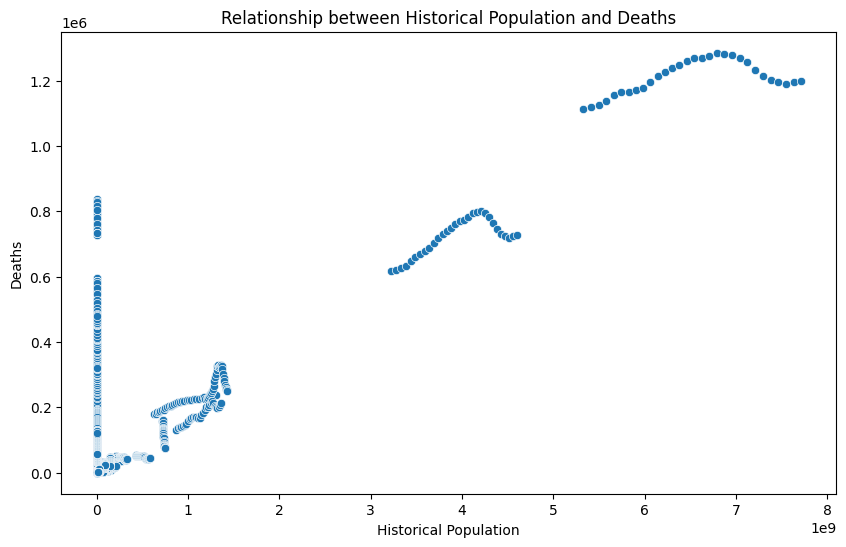

In [48]:
# Checking relationship between historical population and deaths
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Historical_Population', y='Deaths')
plt.title('Relationship between Historical Population and Deaths')
plt.xlabel('Historical Population')
plt.ylabel('Deaths')
plt.show()

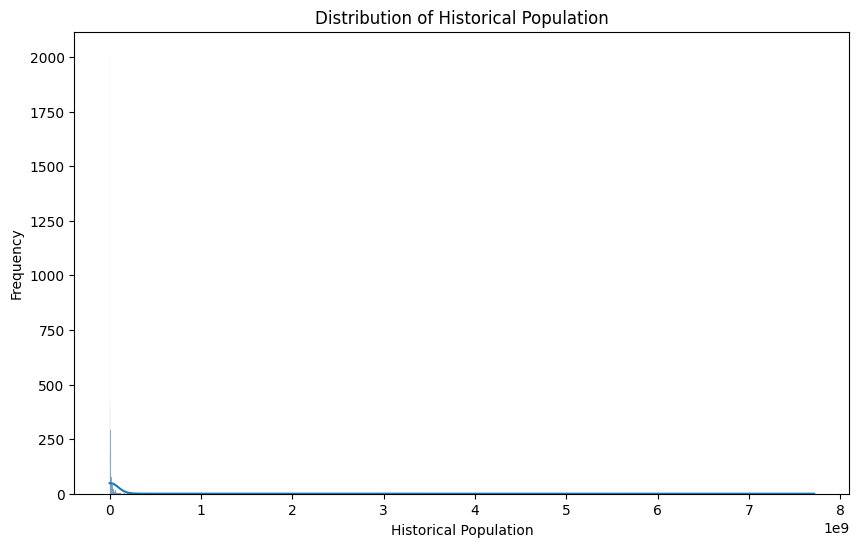

In [49]:
# Distribution of historical population
plt.figure(figsize=(10, 6))
sns.histplot(data['Historical_Population'], kde=True)
plt.title('Distribution of Historical Population')
plt.xlabel('Historical Population')
plt.ylabel('Frequency')
plt.show()

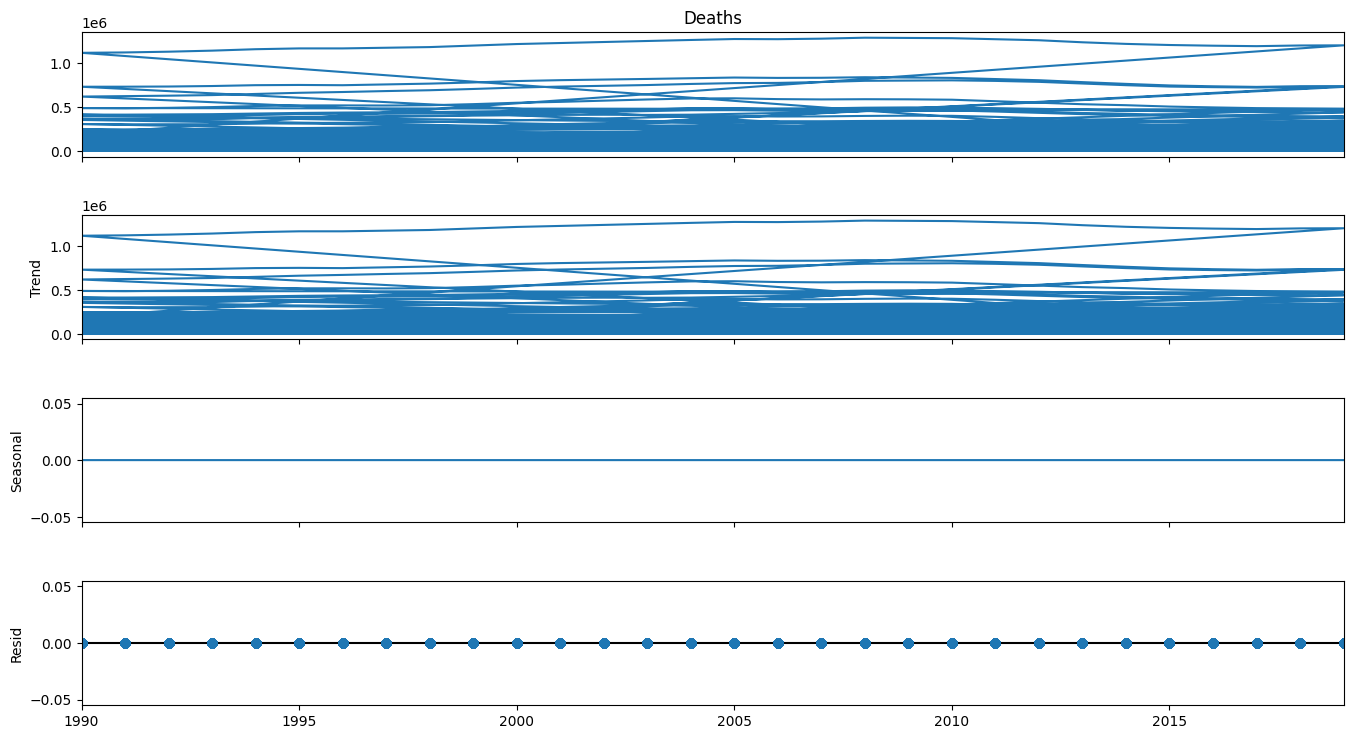

In [50]:
# Time Series Decomposition
if 'Year' in data.columns and 'Deaths' in data.columns:
    data.set_index('Year', inplace=True)
    decomposition = sm.tsa.seasonal_decompose(data['Deaths'], model='additive', period=1)
    fig = decomposition.plot()
    fig.set_size_inches(15, 8)
    plt.show()
    data.reset_index(inplace=True)

In [51]:
# Regression Analysis to predict Deaths based on Historical Population
X = data[['Historical_Population']]
y = data['Deaths']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Deaths   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     6386.
Date:                Sat, 29 Jun 2024   Prob (F-statistic):               0.00
Time:                        16:56:09   Log-Likelihood:            -1.0314e+05
No. Observations:                8010   AIC:                         2.063e+05
Df Residuals:                    8008   BIC:                         2.063e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3.172e+

In [52]:
# Analysis summary
print("Summary of the Analysis:")
print(f"Total entries: {len(data)}")
print(f"Missing values: \n{data.isnull().sum()}")
print(f"Top 10 entities by deaths: \n{data.groupby('Entity')['Deaths'].sum().nlargest(10)}")

Summary of the Analysis:
Total entries: 8010
Missing values: 
Year                     0
Entity                   0
Code                     0
Deaths                   0
Sidedness                0
Historical_Population    0
dtype: int64
Top 10 entities by deaths: 
Entity
World                                      36317087
G20                                        23328740
Asia                                       21670793
World Bank Upper Middle Income             16041327
Middle SDI                                 13623644
East Asia & Pacific - World Bank region    13035092
World Bank Lower Middle Income             12599627
Southeast Asia, East Asia, and Oceania     12411258
Western Pacific Region                     10454671
Commonwealth                                8831208
Name: Deaths, dtype: int64


In [53]:
print("\nConclusion based on the data:")
print("- Deaths have been recorded over a range of years.")
print("- Some entities have significantly higher total deaths compared to others.")
print("- Sidedness shows the distribution of deaths across different categories.")
print("- Historical population and deaths have a noticeable relationship, indicating higher population areas may have higher deaths.")


Conclusion based on the data:
- Deaths have been recorded over a range of years.
- Some entities have significantly higher total deaths compared to others.
- Sidedness shows the distribution of deaths across different categories.
- Historical population and deaths have a noticeable relationship, indicating higher population areas may have higher deaths.
